In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import pdb
from sklearn.model_selection import train_test_split as split

In [88]:
def read_data(start,end):
    '''
    Reads all data and places it in a numpy array
    Start: first year of data
    end: last year of data
    
    Returns: numpy array of all data'''
    
    #read in data and place it into a single dataframe
    df = None
    for i in range(start,end+1):
        if i != 2020:
            tmp_df = pd.read_csv('NCAA_Season_Stats_{}.csv'.format(i))
            if df is None:
                df = tmp_df.copy()
            else:
                df = pd.concat([df,tmp_df])
        
    #replace the remaining Nan values with the averages of their columns
    for n,i in enumerate(sum(df.isnull().values)):
        if i != 0:
            mean =df.iloc[:,n].astype('float64').mean()
            df.iloc[:,n].fillna(value=mean, inplace=True)
            
    return np.array(df)
            
    

In [89]:
data = np.array(read_data(1993,2021))

data.shape
X = data[:,1:-1].astype('float64')
y=data[:,-1].astype(int)



X_train, X_test, y_train, y_test = split(X,y,test_size=.3, random_state=8)

In [90]:
MSE =[]
score=[]
kvals = []

for i in range(3,35,2):
    kvals.append(i)
    model = KNeighborsClassifier(n_neighbors=i)
    predict = model.fit(X_train,y_train).predict(X_test)
    MSE.append(np.sum((predict-y_test)**2)/len(y_test))
    score.append(model.fit(X_train,y_train).score(X_test,y_test))
    print("Neighbors = ",i)
    

Neighbors =  3
Neighbors =  5
Neighbors =  7
Neighbors =  9
Neighbors =  11
Neighbors =  13
Neighbors =  15
Neighbors =  17
Neighbors =  19
Neighbors =  21
Neighbors =  23
Neighbors =  25
Neighbors =  27
Neighbors =  29
Neighbors =  31
Neighbors =  33


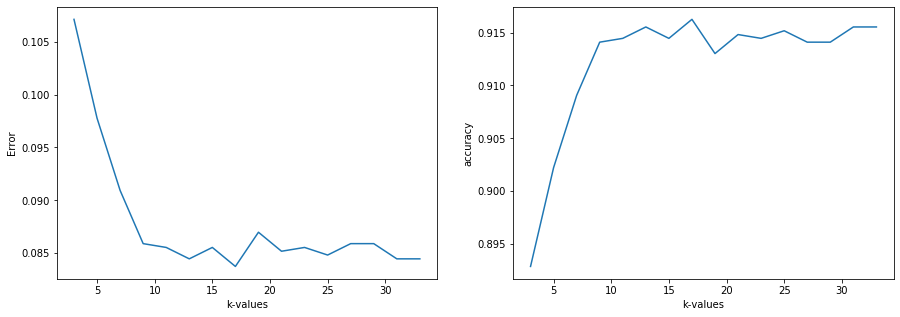

In [86]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(kvals,MSE)
ax[0].set_xlabel("k-values")
ax[0].set_ylabel("Error")

ax[1].plot(kvals,score)
ax[1].set_xlabel("k-values")
ax[1].set_ylabel("accuracy")

plt.show()

Neighbors =  3
Neighbors =  5
Neighbors =  7
Neighbors =  9
Neighbors =  11
Neighbors =  13
Neighbors =  15
Neighbors =  17
Neighbors =  19
Neighbors =  21
Neighbors =  23
Neighbors =  25
Neighbors =  27
Neighbors =  29
Neighbors =  31
Neighbors =  33


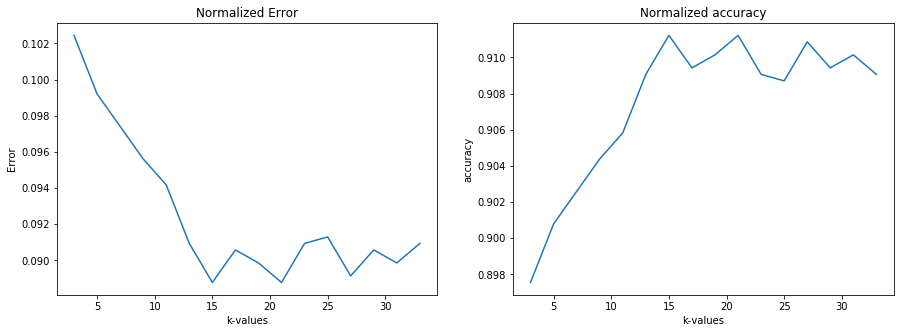

In [87]:
X = ((X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0) + .0001))

X_train, X_test, y_train, y_test = split(X,y,test_size=.3, random_state=8)

MSE_norm =[]
score_norm=[]
kvals_norm = []

for i in range(3,35,2):
    kvals_norm.append(i)
    model = KNeighborsClassifier(n_neighbors=i)
    predict = model.fit(X_train,y_train).predict(X_test)
    MSE_norm.append(np.sum((predict-y_test)**2)/len(y_test))
    score_norm.append(model.fit(X_train,y_train).score(X_test,y_test))
    print("Neighbors = ",i)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(kvals_norm,MSE_norm)
ax[0].set_title('Normalized Error')
ax[0].set_xlabel("k-values")
ax[0].set_ylabel("Error")

ax[1].plot(kvals_norm,score_norm)
ax[1].set_title("Normalized accuracy")
ax[1].set_xlabel("k-values")
ax[1].set_ylabel("accuracy")

plt.show()

NCAA_Season_Stats_2000.csv
NCAA_Season_Stats_2001.csv
NCAA_Season_Stats_2002.csv
NCAA_Season_Stats_2003.csv
NCAA_Season_Stats_2004.csv
NCAA_Season_Stats_2005.csv
NCAA_Season_Stats_2006.csv
NCAA_Season_Stats_2007.csv
NCAA_Season_Stats_2008.csv
NCAA_Season_Stats_2009.csv
NCAA_Season_Stats_2010.csv
NCAA_Season_Stats_2011.csv
NCAA_Season_Stats_2012.csv
NCAA_Season_Stats_2013.csv
NCAA_Season_Stats_2014.csv
NCAA_Season_Stats_2015.csv
NCAA_Season_Stats_2016.csv
NCAA_Season_Stats_2017.csv
NCAA_Season_Stats_2018.csv
NCAA_Season_Stats_2019.csv
NCAA_Season_Stats_2021.csv
Average MSE: 0.1079924012133567
Average Score: 0.8920075987866435


(0.7, 1)

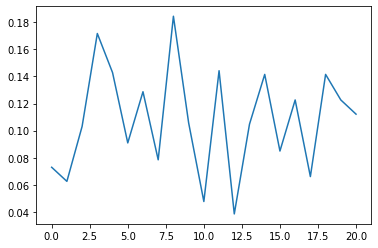

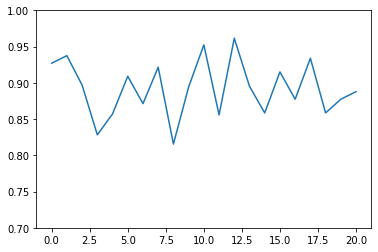

In [98]:
files = ["NCAA_Season_Stats_" + str(i) + ".csv" for i in range(2000, 2022)]

MSEs = []
scores = []

for f in files:
    if f == 'NCAA_Season_Stats_2020.csv':
        continue
    dataFrame = pd.read_csv(f)
    # print(dataFrame)
    npXy = np.array(dataFrame)

    X = npXy[:, 1:-1].astype('float64')
    y = npXy[:, -1].astype(int)
    X = ((X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0) + .0001))

    X_train, X_test, y_train, y_test = split(X,y,test_size=.3, random_state=8)

    model = KNeighborsClassifier(n_neighbors=15)
    predict = model.fit(X_train,y_train).predict(X_test)
    MSEs.append(np.sum((predict-y_test)**2)/len(y_test))
    scores.append(model.fit(X_train,y_train).score(X_test,y_test))

    print(f)
    

print("Average MSE: " + str(sum(MSEs)/len(MSEs)))
print("Average Score: " + str(sum(scores)/len(scores)))

plt.plot(MSEs)
plt.figure()
plt.plot(scores)
plt.ylim(.7,1)